### Conditioning and Stability

### Exercise 1: Conditioning Number

In [5]:
import numpy as np
from scipy import linalg

def condnumber(A):
    U, s, Vh = linalg.svd(A)
    if min(s) == 0:
        return np.inf
    value = linalg.norm(np.dot(U, np.dot(s, Vh))) * linalg.norm(np.dot(Vh.transpose(), np.dot(np.reciprocal(s), U.transpose())))
    
    return value

print(condnumber(np.array([[1,1],[1,1.000000001]])))
print(np.linalg.cond(np.array([[1,1],[1,1.000000001]])))

3999999887.515753
3999999887.515756


### Exercise 2: Wilkinson Polynomial

[1 -210 20615 -1256850 53327946 -1672280820]
20.447302005889558
1.41124822249718e+19
19.740852488393962
1.36248992540925e+19
20.435207231098694
1.41041345566974e+19
20.250479376146775
1.39766376102193e+19
20.360963711984077
1.40528925716412e+19
20.536679482549665
1.41741694857319e+19
20.038031408584086
1.38300085750001e+19
20.606332686937225
1.42222432907037e+19
20.90188258651728
1.44262282811545e+19
20.80565162153532
1.43598108250809e+19
20.85827516415964
1.43961309620695e+19
20.563904529167733
1.41929598858718e+19
21.233635365465883
1.46552000640650e+19
20.602799921750204
1.42198050186084e+19
20.376889521400514
1.40638843739946e+19
21.45301455518456
1.48066129455562e+19
20.39099863713602
1.40736223161920e+19
20.578351604562613
1.42029310837665e+19
20.691801104662396
1.42812325659439e+19
21.140895127990976
1.45911918661850e+19
20.746100889038924
1.43187096248543e+19
21.122548649958883
1.45785293474310e+19
20.135140949688626
1.38970324137597e+19
20.664591465713666
1.42624527999923e+19


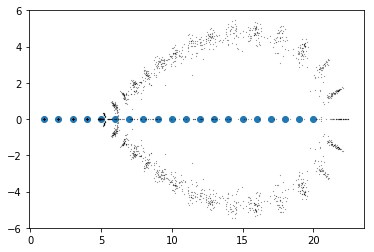

In [35]:
import sympy as sy
from matplotlib import pyplot as plt
# The roots of w are 1, 2, ..., 20.
w_roots = np.arange(1, 21)
# Get the exact Wilkinson polynomial coefficients using SymPy.
x, i = sy.symbols('x i')
w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
w_coeffs = np.array(w.all_coeffs())
print(w_coeffs[:6])

# Perturb one of the coefficients very slightly. 100 times
def randomperturb(N, w_coeffs):

    h = np.random.normal(1,10**(-10),(21,N))
    plt.scatter(np.real(np.arange(1, 21)), np.imag(np.arange(1, 21)))
    for i in range(N):
        new_coeffs = w_coeffs * h[:,i]
        new_roots = np.roots(np.poly1d(new_coeffs))
        plt.scatter(new_roots.real, new_roots.imag, marker='.', color='black', s=0.1)
        k = linalg.norm(new_roots - np.arange(1, 21), np.inf) / linalg.norm(h[:,i], np.inf)
        print(k)
        print(k * linalg.norm(w_coeffs, np.inf) / linalg.norm(np.arange(1, 21), np.inf))
    plt.show()  
    

        
randomperturb(100, w_coeffs)



# Use NumPy to compute the roots of the perturbed polynomial.


### Exercise 3: Computing Eigenvalues

In [37]:
# Compute the conditioning number for the eigenvector function

def eicond(A):
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j*imags
    λ = linalg.eigvals(A)
    λhat = linalg.eigvals(A + H)
    
    k = linalg.norm(λ - λhat,2) / linalg.norm(H,2)
    
    relk = k * linalg.norm(A, 2) / linalg.norm(λ, 2)
    
    return k, relk

A = np.random.uniform(-1,1,(10,10))
print(A)
eicond(A)
  

[[-0.48411289  0.61653437  0.46709694 -0.12155743  0.05881946  0.24459268
  -0.40844131  0.38290969 -0.73270597  0.52108869]
 [ 0.09348695 -0.94839773 -0.029578   -0.73919673 -0.01702979  0.80304663
  -0.07642217 -0.89813973  0.85431254 -0.03929187]
 [-0.83103594  0.81730116  0.00434341  0.34729359  0.31785542 -0.49870874
   0.76528314 -0.45379316 -0.97320583  0.21761145]
 [ 0.43243029 -0.46938691  0.10720364  0.22743298 -0.85800581 -0.9393514
  -0.41651314 -0.48878481  0.97177982  0.11967841]
 [ 0.58988145 -0.51454215  0.778025    0.8426057  -0.192492   -0.04533401
  -0.25590674  0.02412778  0.40103678  0.6220083 ]
 [ 0.95300082  0.59908696 -0.27485562  0.59930626  0.69491694  0.3111903
  -0.75894064 -0.21737862  0.44230861  0.11324189]
 [-0.87506898  0.92387988  0.59598918  0.94740527 -0.07280092  0.88415072
  -0.28562877 -0.26091403  0.24379361  0.57188149]
 [ 0.94422745 -0.80677267 -0.05700978  0.61805023 -0.27703619  0.86826362
  -0.21332405  0.85181415 -0.30398088 -0.57172381]
 [

(5574693892.607374, 3962076298.109208)

### Exercise 4

In [41]:
matrix = lambda x,y: np.array([[1,x],[y,1]])

def plotcond(X,res=200):
    result = np.zeros([res,res])
    x = np.linspace(X[0],X[1],res)
    y = np.linspace(X[2],X[3],res)
    
    for i,itemx in enumerate(x):
        for j,itemy in enumerate(y):
            A = matrix(itemx, itemy)
            result[i,j] = eicond(A)[1]
    
    X, Y = np.meshgrid(x,y)
    return result, X, Y


xmin =-100
xmax = 100
X = [xmin,xmax,xmin,xmax]


result, X, Y = plotcond(X)



AttributeError: module 'matplotlib.pyplot' has no attribute 'colormesh'

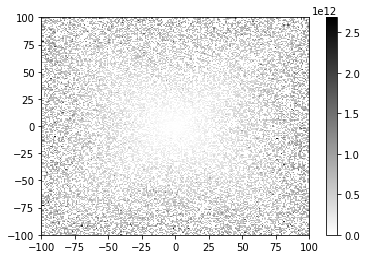

In [44]:
plt.pcolormesh(X,Y,result, cmap='gray_r')
plt.colorbar()

### Exercise 5: Build OLS solver

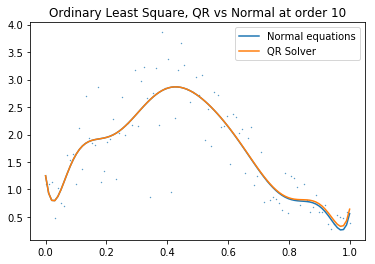

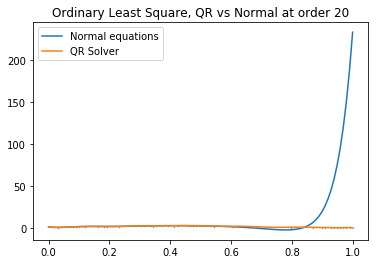

(387.10661486335925, 4.462059191296571)

In [93]:

def OLS(n):
    xk, yk = np.load("stability_data.npy").T
    A = np.vander(xk, n+1)
    
    #Normal equation

    coefnormal = np.dot(linalg.inv(np.dot(A.T,A)),np.dot(A.T,yk))

    
    #QR equations
    Q, R = linalg.qr(A, mode='economic')
    coefQR = linalg.solve_triangular(R, np.dot(Q.T,yk))

    
    #Prediction
    Yhatnormal = np.polyval(coefnormal, xk)
    YhatQR = np.polyval(coefQR, xk)
    
    #Plot
    plt.scatter(xk, yk, marker='.', s=.5)
    plt.plot(xk, Yhatnormal)
    plt.plot(xk, YhatQR)
    plt.legend(['Normal equations', 'QR Solver'])
    plt.title("Ordinary Least Square, QR vs Normal at order %d" % n)
    plt.show()
    
    #Error
    error1 = linalg.norm(Yhatnormal - yk, 2)
    error2 = linalg.norm(YhatQR- yk, 2)
    
    return error1,error2


OLS(10)
OLS(20)  
    
    

### Exercise 6: Catastrophic Errors

0.14553294057307858
0.14553294057307858
0.0
0.08387707010339417
0.08387707010339417
0.0
0.059017540879297774
0.059017540879297774
0.0
0.045544884075818054
0.045544884075818054
0.0
0.03708621442373924
0.03708621442373924
0.0
0.03127967393216808
0.03127967393216808
0.0
0.027046289409060773
0.027046289409060773
0.0
0.02382272866903348
0.02382272866903348
0.0
0.021286039085606067
0.021286039085606067
0.0
0.019237754434339383
0.019237754434339383
0.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


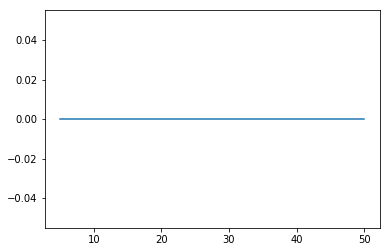

In [130]:
import sympy as sy
from sympy.utilities.lambdify import lambdify

x =  sy.symbols('x')

result = []
result2 = []
error = []

for n in range(5,55,5):
    expr = x**n * sy.exp(x-1)
    function = float(sy.integrate(expr, (x, 0, 1)).evalf())
    result.append(function)
    print(function)
    bis = float(((-1)**n * sy.subfactorial(n) + (-1)**(n+1) * sy.factorial(n)/sy.exp(1)).evalf())
    print(bis)
    result2.append(bis)
    
    print(abs(function - bis)/abs(bis))
    error.append((abs(function - bis)/abs(bis)))
    
print(error)
plt.plot(range(5,55,5), error)
plt.show()


I suppose the algorithm is stable. 